In [14]:
import pandas as pd
import seaborn as sb
import pylab as py
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import folium
from folium import plugins
from geopy.geocoders import Nominatim
import datetime
import statsmodels.api as sm

# Purpose: To figure out the increase in cost incurred, for every % increase in Cancer Incidence in Singapore

In [16]:
df = pd.read_csv("health-expenditure2.csv")
df

,Year,Current health expenditure (% of GDP)
0,2000,3.343364
1,2001,3.163027
2,2002,3.358464
3,2003,3.606992
4,2004,3.150198
5,2005,3.033679
6,2006,2.934747
7,2007,2.837491
8,2008,3.194885
9,2009,3.398531


In [17]:
df['%increase'] = 0

In [18]:
i = 1
while i < len(df):
    df['%increase'][i] = 100*(df['Current health expenditure (% of GDP)'][i] - df['Current health expenditure (% of GDP)'][i-1])/(df['Current health expenditure (% of GDP)'][i-1])
    i += 1

C:\Users\colin\AppData\Local\Temp\ipykernel_6292\2595082051.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['%increase'][i] = 100*(df['Current health expenditure (% of GDP)'][i] - df['Current health expenditure (% of GDP)'][i-1])/(df['Current health expenditure (% of GDP)'][i-1])


In [4]:
# i = 1
# while i < len(df):
#     df['%increase'][i] = 100*(df['Government Health Expenditure1 ($m)'][i] - df['Government Health Expenditure1 ($m)'][i-1])/(df['Government Health Expenditure1 ($m)'][i-1])
#     i += 1

C:\Users\colin\AppData\Local\Temp\ipykernel_6292\3170584658.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['%increase'][i] = 100*(df['Government Health Expenditure1 ($m)'][i] - df['Government Health Expenditure1 ($m)'][i-1])/(df['Government Health Expenditure1 ($m)'][i-1])


In [19]:
df

,Year,Current health expenditure (% of GDP),%increase
0,2000,3.343364,0
1,2001,3.163027,-5
2,2002,3.358464,6
3,2003,3.606992,7
4,2004,3.150198,-12
5,2005,3.033679,-3
6,2006,2.934747,-3
7,2007,2.837491,-3
8,2008,3.194885,12
9,2009,3.398531,6


In [20]:
# # for index, rows in df.iterrows():
# #       print(int(rows['Government Health Expenditure1 ($m)']) - int(rows['Government Health Expenditure1 ($m)']))
# #      print(rows['Government Health Expenditure1 ($m)'])
# #     print(rows)

# i row = row["Government Health Expenditure"]
# i-1 th row = df[[index-1]]["Government Health Expenditure"]

In [21]:
df1 = pd.read_csv("world-cancer.csv")
df1

,Year,Cancer incidence
0,1985,369663
1,1986,373348
2,1987,389483
3,1988,460898
4,1989,497266
5,1990,513987
6,1991,536123
7,1992,560173
8,1993,595895
9,1994,608239


In [22]:
df1['%increase'] = 0.0

In [23]:
i = 1
while i < len(df1):
    df1['%increase'][i] = 100*(df1['Cancer incidence'][i] - df1['Cancer incidence'][i-1])/(df1['Cancer incidence'][i-1])
    i += 1

C:\Users\colin\AppData\Local\Temp\ipykernel_6292\365235291.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['%increase'][i] = 100*(df1['Cancer incidence'][i] - df1['Cancer incidence'][i-1])/(df1['Cancer incidence'][i-1])


In [24]:
df1

,Year,Cancer incidence,%increase
0,1985,369663,0.000000
1,1986,373348,0.996854
2,1987,389483,4.321705
3,1988,460898,18.335845
4,1989,497266,7.890683
5,1990,513987,3.362587
6,1991,536123,4.306724
7,1992,560173,4.485911
8,1993,595895,6.376959
9,1994,608239,2.071506


In [26]:
df1 = df1[df1['Year'] > 1999]
X = df1['%increase']
X = X.reset_index().drop(columns = 'index')

df = df[df['Year'] < 2011]
y = df['Current health expenditure (% of GDP)']
y = y.reset_index().drop(columns = 'index')
y = y.astype(int)

# Define the modell
X = sm.add_constant(X)
model = sm.OLS(y, X)

# Fit the model
model_fit = model.fit()

# Print the model summary
print(model_fit.summary())

                                      OLS Regression Results                                     
Dep. Variable:     Current health expenditure (% of GDP)   R-squared:                       0.002
Model:                                               OLS   Adj. R-squared:                 -0.109
Method:                                    Least Squares   F-statistic:                   0.01402
Date:                                   Wed, 30 Mar 2022   Prob (F-statistic):              0.908
Time:                                           03:47:16   Log-Likelihood:                -5.1200
No. Observations:                                     11   AIC:                             14.24
Df Residuals:                                          9   BIC:                             15.04
Df Model:                                              1                                         
Covariance Type:                               nonrobust                                         
                 coe

C:\Users\colin\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<AxesSubplot:xlabel='%increase', ylabel='Current health expenditure (% of GDP)'>

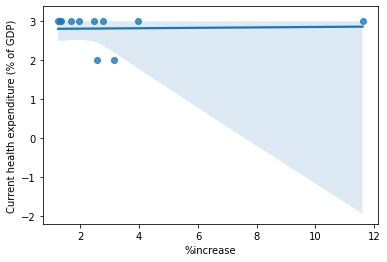

In [32]:
sb.regplot(x=X['%increase'], y=y['Current health expenditure (% of GDP)'])